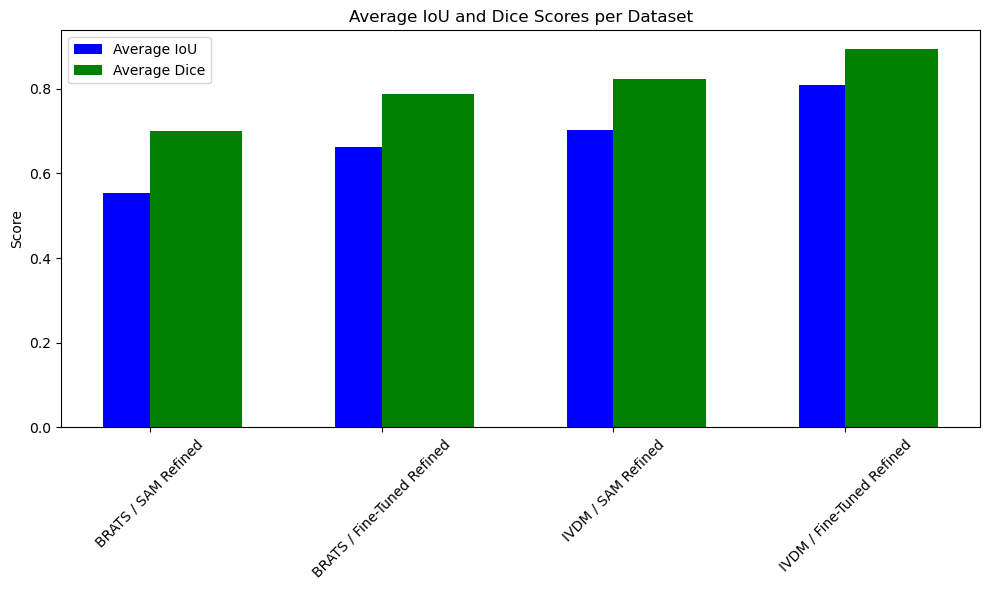

In [1]:
import matplotlib.pyplot as plt
import ast  # To parse string representation of lists/dictionaries

# 새로운 데이터를 문자열로 변환하여 파싱
data = [
    '0.5539042779485277,0.7005372409890566,"[{\'gt_file_name\': \'1274_T1ce_lbl1.npy\', \'image_name\': \'1274_T1ce.npy\', \'iou\': 0.032055437564849854, \'dice\': 0.06211960315704346}, {\'gt_file_name\': \'1054_T1ce_lbl1.npy\', \'image_name\': \'1054_T1ce.npy\', \'iou\': 0.03274691849946976, \'dice\': 0.06341712176799774}]",/mnt/sda/minkyukim/sam_dataset_refined/brats_npy_test_dataset_1024image,/home/minkyukim/sam-tutorial/work_dir/SAM/sam_vit_b_01ec64.pth',
    '0.6625535300074583,0.7883174687968774,"[{\'gt_file_name\': \'1135_T1ce_lbl2.npy\', \'image_name\': \'1135_T1ce.npy\', \'iou\': 0.08725856244564056, \'dice\': 0.16051115095615387}, {\'gt_file_name\': \'1120_T1ce_lbl1.npy\', \'image_name\': \'1120_T1ce.npy\', \'iou\': 0.11030185967683792, \'dice\': 0.1986880600452423}]",/mnt/sda/minkyukim/sam_dataset_refined/brats_npy_test_dataset_1024image,/mnt/sda/minkyukim/pth/sam-tutorial_brats/medsam_model_best_refined.pth',
    '0.7017232477664948,0.8228167585876524,"[{\'gt_file_name\': \'14-09_fat_3.npy\', \'image_name\': \'14-09_fat.npy\', \'iou\': 0.4471549987792969, \'dice\': 0.617978036403656}, {\'gt_file_name\': \'14-18_fat_4.npy\', \'image_name\': \'14-18_fat.npy\', \'iou\': 0.5038915276527405, \'dice\': 0.6701169013977051}]",/mnt/sda/minkyukim/sam_dataset_refined/ivdm_npy_test_dataset_1024image,/home/minkyukim/sam-tutorial/work_dir/SAM/sam_vit_b_01ec64.pth',
    '0.8084783129850213,0.8935590314925933,"[{\'gt_file_name\': \'14-19_opp_5.npy\', \'image_name\': \'14-19_opp.npy\', \'iou\': 0.5783703923225403, \'dice\': 0.7328702807426453}, {\'gt_file_name\': \'14-15_opp_2.npy\', \'image_name\': \'14-15_opp.npy\', \'iou\': 0.6135854721069336, \'dice\': 0.7605242729187012}]",/mnt/sda/minkyukim/sam_dataset_refined/ivdm_npy_test_dataset_1024image,/mnt/sda/minkyukim/pth/sam-tutorial_ivdm/medsam_model_best_refined.pth'
]


# 데이터셋 이름
dataset_names = [
    "BRATS / SAM Refined",
    "BRATS / Fine-Tuned Refined",
    "IVDM / SAM Refined",
    "IVDM / Fine-Tuned Refined"
]

# 데이터 파싱 함수
def parse_data(data):
    avg_iou, avg_dice, worst_cases_str, dataset_path, checkpoint_path = data.split(",")[:5]
    return {
        "avg_iou": float(avg_iou),
        "avg_dice": float(avg_dice),
    }

# 데이터 파싱
parsed_data = [parse_data(d) for d in data]

# 평균 IoU와 Dice 값 시각화
avg_ious = [d['avg_iou'] for d in parsed_data]
avg_dices = [d['avg_dice'] for d in parsed_data]

# 그래프 그리기
x = range(len(parsed_data))

plt.figure(figsize=(10, 6))
plt.bar(x, avg_ious, width=0.4, label="Average IoU", align='center', color='blue')
plt.bar(x, avg_dices, width=0.4, label="Average Dice", align='edge', color='green')
plt.xticks(x, dataset_names, rotation=45)
plt.ylabel("Score")
plt.title("Average IoU and Dice Scores per Dataset")
plt.legend()
plt.tight_layout()
plt.show()
